# Advent of code 2019

### imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Day 1 - part 1

In [21]:
# load data
with open('./data_2019/d1p1.csv', 'r') as f:
    data = np.array(f.readlines()).astype(int)

In [24]:
np.sum(np.floor(data / 3) - 2).astype(int)

3161483

The first half of this puzzle is complete! It provides one gold star: *

### Day 1 - part 2

In [87]:
def get_fuel(mass):
    return (np.floor(mass / 3) - 2).astype(int)

In [89]:
get_fuel(data);

In [90]:
get_fuel(1969)

654

mass 1969 is 654 + 216 + 70 + 21 + 5 = 966 fuel

In [146]:
def get_fuel_recursive(mass):
    if (np.floor(mass / 3) - 2).astype(int) <= 0:
        return 0
    else:
        mass = (np.floor(mass / 3) - 2).astype(int)
        new_mass = get_fuel_recursive(mass)
        mass += new_mass
        return mass
    
get_fuel_recursive(1969)

50346

In [160]:
np.array(list(map(get_fuel_recursive, data))).sum()

4739374

That's the right answer! You are one gold star closer to rescuing Santa.

### Day 2 - part 1

In [531]:
window = 4

In [777]:
data = np.array([1,9,10,3,2,3,11,0,99,30,40,50])

In [778]:
def get_codes(data, start, window):
    end = start + window
    codes = data[start:end]
    return codes

In [779]:
def intcode(codes, data):
    op = codes[0]
    a, b = codes[1], codes[2]
    out = codes[-1]
    if op == 1:
        return data[a] + data[b], out
    else:#if op == 2:
        return data[a] * data[b], out
    #else:
    #    return np.nan, np.nan

In [780]:
def update_data(codes, data):
    value, index = intcode(codes, data)
    data[index] = value
    return data

In [781]:
def run_codes(data):
    for i in range(len(data) // window):
        codes = get_codes(data, i * window, window)
        if codes[0] == 99:
            break
        update_data(codes, data)
    return data

In [782]:
run_codes(data)

array([3500,    9,   10,   70,    2,    3,   11,    0,   99,   30,   40,
         50])

3500,9,10,70,
2,3,11,0,
99,
30,40,50

1,0,0,0,99 becomes 2,0,0,0,99 (1 + 1 = 2).

2,3,0,3,99 becomes 2,3,0,6,99 (3 * 2 = 6).

2,4,4,5,99,0 becomes 2,4,4,5,99,9801 (99 * 99 = 9801).

1,1,1,4,99,5,6,0,99 becomes 30,1,1,4,2,5,6,0,99

In [783]:
run_codes([1,1,1,4,99,5,6,0,99])

[30, 1, 1, 4, 2, 5, 6, 0, 99]

To do this, before running the program, replace position 1 with the value 12 and replace position 2 with the value 2. What value is left at position 0 after the program halts?

In [784]:
with open('./data_2019/day2.csv','r') as f:
    data = f.readlines()
data

['1,0,0,3,1,1,2,3,1,3,4,3,1,5,0,3,2,1,10,19,1,6,19,23,1,10,23,27,2,27,13,31,1,31,6,35,2,6,35,39,1,39,5,43,1,6,43,47,2,6,47,51,1,51,5,55,2,55,9,59,1,6,59,63,1,9,63,67,1,67,10,71,2,9,71,75,1,6,75,79,1,5,79,83,2,83,10,87,1,87,5,91,1,91,9,95,1,6,95,99,2,99,10,103,1,103,5,107,2,107,6,111,1,111,5,115,1,9,115,119,2,119,10,123,1,6,123,127,2,13,127,131,1,131,6,135,1,135,10,139,1,13,139,143,1,143,13,147,1,5,147,151,1,151,2,155,1,155,5,0,99,2,0,14,0\n']

In [785]:
data = np.array(data[0].split(',')).astype(int)

In [786]:
data[1] = 12
data[2] = 2

In [787]:
run_codes(data)

array([6327510,      12,       2,       2,       1,       1,       2,
             3,       1,       3,       4,       3,       1,       5,
             0,       3,       2,       1,      10,      48,       1,
             6,      19,      50,       1,      10,      23,      54,
             2,      27,      13,     270,       1,      31,       6,
           272,       2,       6,      35,     544,       1,      39,
             5,     545,       1,       6,      43,     547,       2,
             6,      47,    1094,       1,      51,       5,    1095,
             2,      55,       9,    3285,       1,       6,      59,
          3287,       1,       9,      63,    3290,       1,      67,
            10,    3294,       2,       9,      71,    9882,       1,
             6,      75,    9884,       1,       5,      79,    9885,
             2,      83,      10,   39540,       1,      87,       5,
         39541,       1,      91,       9,   39544,       1,       6,
            95,   39

That's not the right answer; your answer is too low. If you're stuck, make sure you're using the full input data; there are also some general tips on the about page, or you can ask for hints on the subreddit. Please wait one minute before trying again. (You guessed 6327508.) 

6327510: That's the right answer! You are one gold star closer to rescuing Santa.

### Day 2 - part 2

In [788]:
target = 19690720
window = 4

In [789]:
with open('./data_2019/day2.csv','r') as f:
    data = f.readlines()
data = np.array(data[0].split(',')).astype(int)

In [790]:
data_test = data.copy()

In [791]:
data_test

array([  1,   0,   0,   3,   1,   1,   2,   3,   1,   3,   4,   3,   1,
         5,   0,   3,   2,   1,  10,  19,   1,   6,  19,  23,   1,  10,
        23,  27,   2,  27,  13,  31,   1,  31,   6,  35,   2,   6,  35,
        39,   1,  39,   5,  43,   1,   6,  43,  47,   2,   6,  47,  51,
         1,  51,   5,  55,   2,  55,   9,  59,   1,   6,  59,  63,   1,
         9,  63,  67,   1,  67,  10,  71,   2,   9,  71,  75,   1,   6,
        75,  79,   1,   5,  79,  83,   2,  83,  10,  87,   1,  87,   5,
        91,   1,  91,   9,  95,   1,   6,  95,  99,   2,  99,  10, 103,
         1, 103,   5, 107,   2, 107,   6, 111,   1, 111,   5, 115,   1,
         9, 115, 119,   2, 119,  10, 123,   1,   6, 123, 127,   2,  13,
       127, 131,   1, 131,   6, 135,   1, 135,  10, 139,   1,  13, 139,
       143,   1, 143,  13, 147,   1,   5, 147, 151,   1, 151,   2, 155,
         1, 155,   5,   0,  99,   2,   0,  14,   0])

In [816]:
results = {}
for i in range(100):
    for j in range(100):
        data_test = data.copy()
        data_test[1] = i
        data_test[2] = j
        try:
            result = run_codes(data_test)[0]
        except IndexError:
            result = np.nan
        results[(i,j)] = result
        if result == target:
            print(i, j, result)
            print(100 * i + j)
            break
#results

41 12 19690720
4112


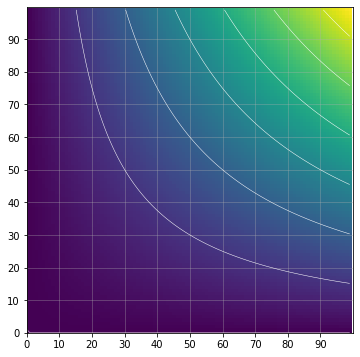

In [749]:
x = np.arange(0,100,1)
y = np.arange(0,100,1)

fig = plt.figure(figsize=(6,6))
plt.imshow(x * y.reshape(100,-1))
plt.xlim(0,100)
plt.ylim(0,100)
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,100,10))
plt.grid(alpha=0.4)
plt.contour(x * y.reshape(100,-1), colors='w', linewidths=0.5)

In [736]:
x = np.arange(0,10,1)
y = np.arange(0,10,1)
x * y.reshape(10,-1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

Both parts of this puzzle are complete! They provide two gold stars: **

### Day 3 - part 1